<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python </h2>
</div>

<h1 >Objectifs de la mission</h1>
    <ol>
<li>Une analyse des différents indicateurs de vente, qui a été demandée directement par Antoine : 
    <ul>
        <li>Donner différents indicateurs et graphiques autour du chiffre d'affaires. Regarder l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale.</li>
        <li>Zoom sur les références, pour voir les tops et les flops, la répartition par catégorie, etc...</li>
        <li>Quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.
</li>
        </ul>
    </li>
<li>Une analyse plus ciblée sur les clients : l’objectif est de comprendre le comportement de nos clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via nos librairies physiques.</li>
    <li>Examiner 5 corrélations :
        <ul>
<li>le lien entre le genre d’un client et les catégories des livres achetés,</li>
<li>le lien entre l'âge des clients et le montant total des achats,</li>
<li>le lien entre l'âge des clients et la fréquence d’achat,</li>
<li>le lien entre l'âge des clients et la taille du panier moyen,</li>
<li>le lien entre l'âge des clients et la catégorie des livres achetés.</li>
        </ul></li>
        </ol>
    </div>

# Table des matières
* [Etape 1 - Importation des librairies et chargement des fichiers](#etape1)
    * [1.1. Importation des librairies](#section1_1)
    * [1.2. Chargement des fichiers Excel](#section1_2)
* [Etape 2 - Analyse et nettoyage des fichiers](#etape2)
    * [2.1. - Analyse et nettoyage du fichier clients](#section2_1)
    * [2.2 - Analyse et nettoyage du fichier produits](#section2_2)
    * [2.3 - Analyse et nettoyage du fichier transactions](#section2_3)
* [Etape 3 - Jointure des tables](#etape3)
* [Etape 4 - Analyse des différents indicateurs de vente](#etape4)
    * [4.1 - Analyses autour du chiffre d'affaires](#section4_1)
    * [4.2 - Analyses autour des références](#section4_2)
* [Etape 5 - Analyse approfondie sur les clients](#etape5)
* [Etape 6 - Analyse de 5 corellations](#etape5)  
    * [6.1 - Lien entre le genre d’un client et les catégories des livres achetés](#section6_1)
    * [6.2 - Lien entre l'âge des clients et le montant total des achats](#section6_2)
    * [6.3 - Lien entre l'âge des clients et la fréquence d’achat](#section6_3)
    * [6.4 - Lien entre l'âge des clients et la taille du panier moyen](#section6_4)
    * [6.5 - Lien entre l'âge des clients et la catégorie des livres achetés](#section6_5)

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape1"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3></a>
</div>

In [1]:
#Importation de la librairie pandas
import pandas as pd
#Importation de la librairie numpy
import numpy as np
#Importation de la librairie Matplotlib
import matplotlib.pyplot as plt
#Importation de la librairie seaborn
import seaborn as sns
#Importation de la librairie datetime (pour les dates)
import datetime as dt
#Importation de la librairie stats
import scipy.stats as st
#Importation de la librairie stats models
import statsmodels.api as sm

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3></a>
</div>

In [2]:
#Importation du fichier customers.csv
clients = pd.read_csv('customers.csv')

#Importation du fichier products.csv
produits = pd.read_csv('products.csv')

#Importation du fichier Transactions.csv
transactions = pd.read_csv('Transactions.csv')

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape2"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse et nettoyage des fichiers</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse et nettoyage du fichier clients</h3></a>
</div>

In [3]:
#visualisation du fichier clients
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} personnes".format(clients.shape[0]))
print("Le tableau comporte {} colonnes".format(clients.shape[1]))

Le tableau comporte 8623 personnes
Le tableau comporte 3 colonnes


In [5]:
#Création de la colonne age
clients['age'] = 2023-clients['birth']
#Suppression de la colonne année de naissance
clients=clients.drop(columns='birth')
clients

,client_id,sex,age
0,c_4410,f,56
1,c_7839,f,48
2,c_1699,f,39
3,c_5961,f,61
4,c_5320,m,80
...,...,...,...
8618,c_7920,m,67
8619,c_7403,f,53
8620,c_5119,m,49
8621,c_5643,f,55


<a class="anchor" id="section2_1_1"><h3 style="color: RGB(0,150,250); ">2.1.1. Erreurs de type</h3></a>

In [6]:
#La nature des données dans chacune des colonnes
print('La nature des données dans chaque colonnes :\n',clients.dtypes)

La nature des données dans chaque colonnes :
 client_id    object
sex          object
age           int64
dtype: object


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Rien à signaler</li>
    </ul>

<a class="anchor" id="section2_1_2"><h3 style="color: RGB(0,150,250); ">2.1.2. Valeurs manquantes</h3></a>

In [7]:
#Pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = clients.isnull().sum()
nb_na[nb_na>0]

Series([], dtype: int64)

<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Aucune valeur manquante</li>
    </ul>

<a class="anchor" id="section2_1_3"><h3 style="color: RGB(0,150,250); ">2.1.3. Doublons</h3></a>

In [8]:
clients.loc[clients[['client_id']].duplicated(keep=False),:]

,client_id,sex,age


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Aucun doublon sur la clé primaire de la table.</li>
    </ul>

<a class="anchor" id="section2_1_4"><h3 style="color: RGB(0,150,250); ">2.1.4. Détection d'outliers</h3>

In [9]:
clients.describe()

,age
count,8623.000000
mean,44.719123
std,16.919535
min,19.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,94.000000


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Il y a potentiellement des clients très vieux, mais la librairie existe depuis assez longtemps pour penser que ce genre de personne soit dans le fichier client.</li>
    </ul>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse et nettoyage du fichier produits</h3></a>
</div>

In [10]:
#Visualisation du fichier produits
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(produits.shape[0]))
print("Le tableau comporte {} colonnes".format(produits.shape[1]))

Le tableau comporte 3287 articles
Le tableau comporte 3 colonnes


<a class="anchor" id="section2_2_1"><h3 style="color: RGB(0,150,250); ">2.2.1. Erreurs de type</h3>

In [12]:
#La nature des données dans chacune des colonnes
print('La nature des données dans chaque colonnes :\n',produits.dtypes)

La nature des données dans chaque colonnes :
 id_prod     object
price      float64
categ        int64
dtype: object


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Toutes les colonnes ont les bons types</li>
    </ul>

<a class="anchor" id="section2_2_2"><h3 style="color: RGB(0,150,250); ">2.2.2. Valeurs manquantes</h3>

In [13]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = produits.isnull().sum()
nb_na[nb_na>0]

Series([], dtype: int64)

<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Aucune valeur nulle</li>
    </ul>

<a class="anchor" id="section2_2_3"><h3 style="color: RGB(0,150,250); ">2.2.3. Doublons</h3>

In [14]:
produits.loc[produits['id_prod'].duplicated(keep=False),:].sort_values('id_prod')

,id_prod,price,categ


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Aucun doublon sur la clé primaire de la table.</li>
    </ul>

<a class="anchor" id="section2_2_4"><h3 style="color: RGB(0,150,250); ">2.2.4. Détection d'outliers</h3>

In [15]:
produits.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


<h4 style="color: RGB(0,150,250); ">Observation</h4>
<ul>
    <li>Il y a des prix négatifs</li>
    <li>Il y a des prix élevés, mais certains livres peuvent valloir ce prix.</li>
    </ul>

In [16]:
#Visualisation des références à prix négatifs
produits.loc[produits['price']<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [17]:
#Visualisation dans le fichier transactions
transactions.loc[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [18]:
#Test si cette référence est uniquement présente dans les tests
transactions.loc[(transactions['session_id']!='s_0')&(transactions['id_prod']=='T_0'),:]

,id_prod,date,session_id,client_id


Il semblerait que ce soit un test lors de la création des bases de données. (La suppression des lignes dans le fichier transaction sera effectuée lors du nettoyage du fichier transactions)

In [19]:
#Suppression des articles ayant un prix négatif
produits=produits.loc[produits['price']>0]

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_3"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse et nettoyage du fichier Transactions</h3></a>
</div>

In [20]:
#Visualisation du fichier transactions
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} transactions".format(transactions.shape[0]))
print("Le tableau comporte {} colonnes".format(transactions.shape[1]))

Le tableau comporte 679532 transactions
Le tableau comporte 4 colonnes


<a class="anchor" id="section2_3_1"><h3 style="color: RGB(0,150,250); ">2.3.1. Erreurs de type</h3>

In [22]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>La colonne date n'a pas le bon format</li>
    <li>Lors de la conversion, des lignes 'test' ont généré l'erreur</li>
    </ul>

In [23]:
#Suppression des lignes test
transactions=transactions.loc[~(transactions['date'].str.startswith('test'))]

In [24]:
#Correction du problème de type "m%/%d/%Y, %H:%M:%S"
transactions['date'] = pd.to_datetime(transactions['date'],format="%Y-%m-%d %H:%M:%S")

In [25]:
# Décomposition la date en année, mois et jour
transactions['Year'] = transactions['date'].dt.year
transactions['Month'] = transactions['date'].dt.month
transactions['Day'] = transactions['date'].dt.day

#Création d'une colonne date2 qui ne contiendra des informations que sur les mois jours et année
transactions['date2']=pd.to_datetime(transactions[['Year', 'Month', 'Day']], errors = 'coerce')

#Création d'une colonne annee_mois qui servira pour l'étude du chiffre d'affaires mensuel
transactions['annee_mois']=pd.to_datetime(transactions['Year'].astype(str) + "-" + transactions['Month'].astype(str))

#Suppression des colonnes year, month et day
transactions=transactions.drop(columns=['Year','Month','Day'])

In [26]:
#Affichage du dataset
transactions

,id_prod,date,session_id,client_id,date2,annee_mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022-05-01
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022-02-01
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022-06-01
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021-06-01
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023-01-01
...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022-01-01
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022-03-01
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022-12-01
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021-07-01


<a class="anchor" id="section2_3_2"><h3 style="color: RGB(0,150,250); ">2.3.2. Valeurs manquantes</h3>

In [27]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = transactions.isnull().sum()
nb_na[nb_na>0]

Series([], dtype: int64)

<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>Aucune valeur manquante</li>
    </ul>

<a class="anchor" id="section2_3_3"><h3 style="color: RGB(0,150,250); ">2.3.3. Doublons</h3>

In [28]:
#Détection de doublons
transactions.loc[transactions[['id_prod','date','session_id','client_id','date2','annee_mois']].duplicated(keep=False),:].sort_values('session_id')

,id_prod,date,session_id,client_id,date2,annee_mois


Aucun doublons.

<a class="anchor" id="section2_3_4"><h3 style="color: RGB(0,150,250); ">2.3.4. Détection d'outliers</h3>

In [29]:
transactions.describe(datetime_is_numeric=True)

,date,date2,annee_mois
count,679332,679332,679332
mean,2022-03-03 15:13:19.307389696,2022-03-03 03:12:07.300348416,2022-02-16 08:52:07.067177728
min,2021-03-01 00:01:07.843138,2021-03-01 00:00:00,2021-03-01 00:00:00
25%,2021-09-08 09:14:25.055994368,2021-09-08 00:00:00,2021-09-01 00:00:00
50%,2022-03-03 07:50:20.817730560,2022-03-03 00:00:00,2022-03-01 00:00:00
75%,2022-08-30 23:57:08.555173888,2022-08-30 00:00:00,2022-08-01 00:00:00
max,2023-02-28 23:58:30.792755,2023-02-28 00:00:00,2023-02-01 00:00:00


<h4 style="color: RGB(0,150,250); ">Observations</h4>
<ul>
    <li>Rien à signaler</li>
    </ul>

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape3"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointure des tables</h2></a>
</div>

In [30]:
#Jointures
data=pd.merge(transactions,produits,on='id_prod',how='left')
data=pd.merge(data,clients,on='client_id',how='left')

In [31]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} achats".format(data.shape[0]))
print("Le tableau comporte {} colonnes".format(data.shape[1]))

Le tableau comporte 679332 achats
Le tableau comporte 10 colonnes


In [32]:
#Affichage des premières lignes du dataframe
data.head()

,id_prod,date,session_id,client_id,date2,annee_mois,price,categ,sex,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022-05-01,4.18,0.0,f,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022-02-01,15.99,1.0,m,35
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022-06-01,7.99,0.0,f,55
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021-06-01,69.99,2.0,m,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023-01-01,4.99,0.0,m,43


In [33]:
#Recherche de valeurs manquantes
nb_na = data.isnull().sum()
nb_na[nb_na>0]

price    221
categ    221
dtype: int64

Il reste des valeurs manquantes dans les colonnes venant du fichier produits.

In [34]:
#Recherche des lignes en question
data.loc[data['price'].isnull()]

,id_prod,date,session_id,client_id,date2,annee_mois,price,categ,sex,age
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-23,2022-09-01,NaN,NaN,m,83
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-23,2022-07-01,NaN,NaN,f,60
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-03,2022-12-01,NaN,NaN,m,45
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-16,2021-08-01,NaN,NaN,m,32
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-16,2022-07-01,NaN,NaN,m,50
...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021-08-25,2021-08-01,NaN,NaN,m,42
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022-03-06,2022-03-01,NaN,NaN,f,44
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022-05-16,2022-05-01,NaN,NaN,m,42
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022-02-11,2022-02-01,NaN,NaN,m,37


Il semble que la référence 0_2245 n'a pas de prix.

In [35]:
#Visualisation dans le fichier produits
produits.loc[produits['id_prod']=='0_2245']

,id_prod,price,categ


Il manque une référence dans le fichier ce qui crée des valeurs manquantes dans le dataframe.

In [36]:
#Suppriession de la référence en question
data=data.loc[data['id_prod']!='0_2245']

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape4"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse des différents indicateurs de vente</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section4_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Analyses autour du chiffre d'affaires</h3></a>
</div>

In [37]:
#Chiffre d'affaires total
ca_total=data['price'].sum()
print('Le chiffre d\'affaires total est de ',ca_total,'€')

Le chiffre d'affaires total est de  11853728.68 €


<h3>Evoloution du chiffre d'affaire mensuel</h3>

In [38]:
#Création d'un dataframe avec le chiffre d'affaires et le mois de chaque achat
ca_temporel=data[['annee_mois','price']]

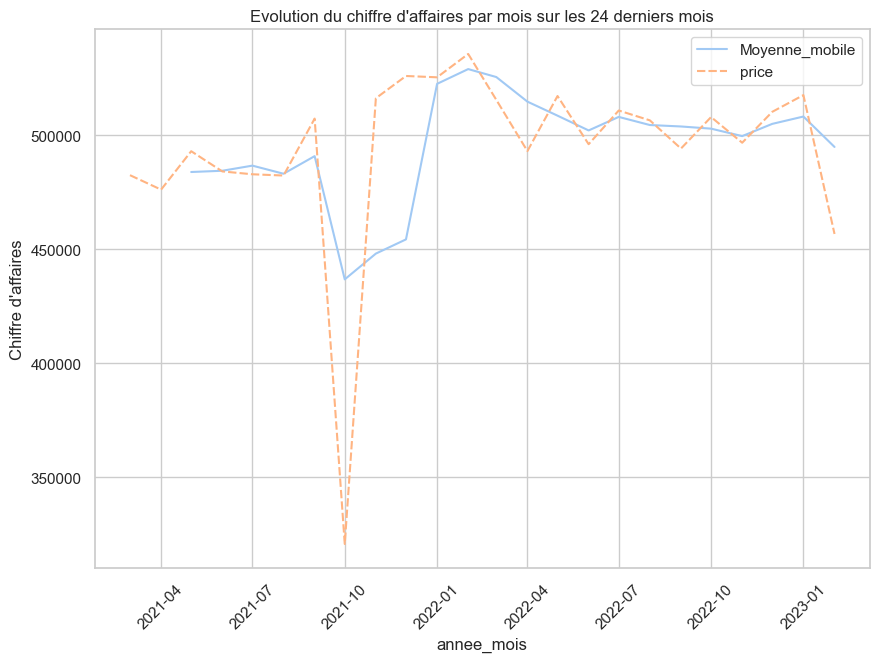

In [39]:
#Chiffre d'affaires par mois les deux dernières années
ca_mensuel=ca_temporel.groupby(['annee_mois']).sum().reset_index()

#Tri par ordre chronologique
ca_mensuel.sort_values(by=['annee_mois'],ascending=True)

#Moyenne mobile sur 3 mois
ca_mensuel['Moyenne_mobile']=ca_mensuel['price'].rolling(3).mean()

#Réarrengement du dataframe pour le graphique
ca_mensuel=ca_mensuel.pivot_table(index='annee_mois',values=['price','Moyenne_mobile'])

#Taille fenêtre
plt.figure(figsize=(10, 7))

#Palette de couleurs
sns.set_theme(style='whitegrid', palette='pastel')

#Le graphique
sns.lineplot(ca_mensuel)

plt.ylabel('Chiffre d\'affaires')
plt.title('Evolution du chiffre d\'affaires par mois sur les 24 derniers mois')
plt.xticks(rotation=45)



plt.show()

Nous observons une grosse baisse de chiffre d'affaires en Octobre 2021.

<h3>Focus sur Octobre 2021</h3>

Text(0.5, 1.0, 'Evolution du C.A en octobre 2021')

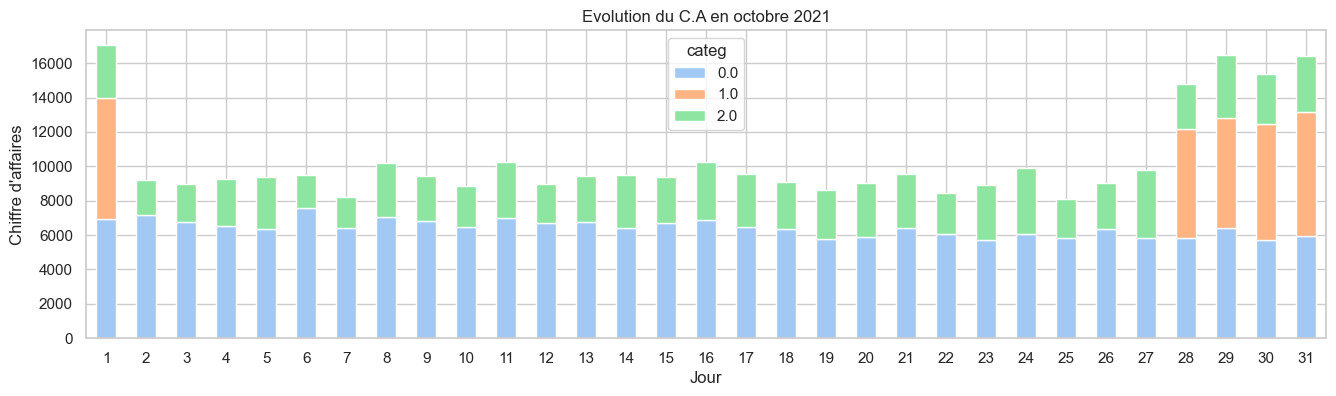

In [40]:
#Focus sur le chiffre d'affaires d'Octobre 2021

#Extraction des données Octobre 2021
octobre=data.loc[data['annee_mois']=='2021-10-01',['date2','price','categ']]

#Ajour de la composante jour
octobre['Jour']=octobre['date2'].dt.day

#Suppression de la colonne date2, inutille pour la suite de l'analyse
octobre=octobre.drop(columns='date2')

#création d'un dataframe avec focus sur la catégorie
ca_octobre = pd.pivot_table(octobre, index = ['Jour'], columns = 'categ', values = 'price',aggfunc=np.sum)

#Visualisation du chiffre d'affaires d'Octobre
ca_octobre.plot.bar(stacked=True,figsize=(16, 4))
plt.xlabel('Jour')
plt.xticks(rotation=0)
plt.ylabel('Chiffre d\'affaires')

plt.title('Evolution du C.A en octobre 2021')

La baisse de chiffre d'affaires s'explique par l'absence de vente de produits de catégorie 1.

<h3>Evoloution du chiffre d'affaire annuel</h3>

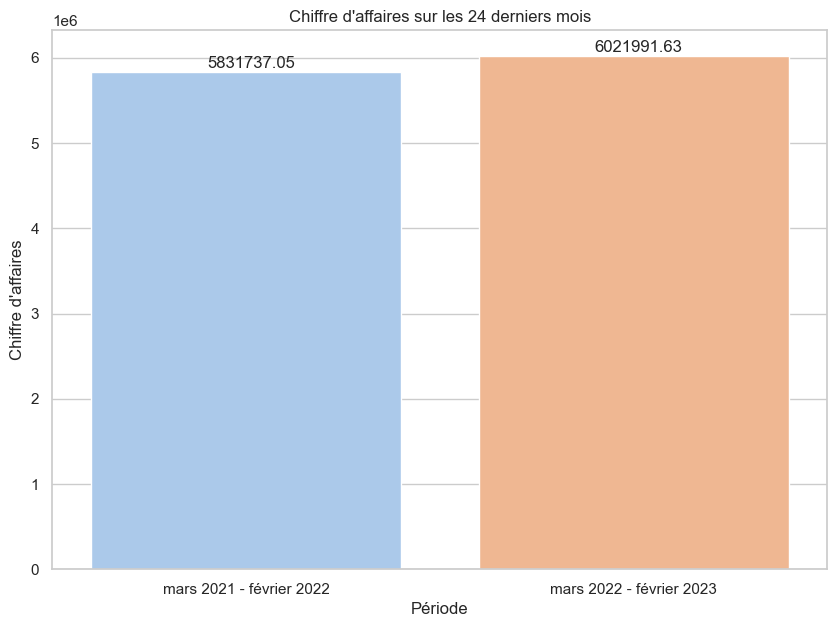

In [41]:
#Chiffre d'affaires sur les 24 derniers mois
#Reprise du dataframe avec le chiffre d'affaires mensuel

#Somme mobile sur 12 mois
ca_douze_mois=ca_mensuel.rolling(12).sum()
#récupération des 12e et 24e lignes qui correspondent au chiffres d'affaires sur 12 mois
ca_douze_mois=ca_douze_mois.iloc[[11,-1],[0,1]]

#Ajout de la dénominationd e la période
ca_douze_mois['perieode']=['mars 2021 - février 2022','mars 2022 - février 2023']
ca_douze_mois

#Taille fenêtre
plt.figure(figsize=(10, 7))

#Palette de couleurs
sns.set_theme(style='whitegrid', palette='pastel')

sns.barplot(data=ca_douze_mois,x='perieode',y='price')
plt.xlabel('Période')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires sur les 24 derniers mois')

#affichage du chiffre d'affaires dans le graphique
ca=ca_douze_mois['price'].tolist()
for i in range(2):
    plt.text(i-0.1,ca[i]+50000,round(ca[i],2))

plt.show()

Le Chiffre d'affaires a sensiblement augmenté sur les deux années passées. 

<h3>Répartition du chiffre d'affaires par catégorie</h3>

C:\Users\adrie\AppData\Local\Temp\ipykernel_19100\3948649821.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca_categ=data.groupby('categ').sum().reset_index()


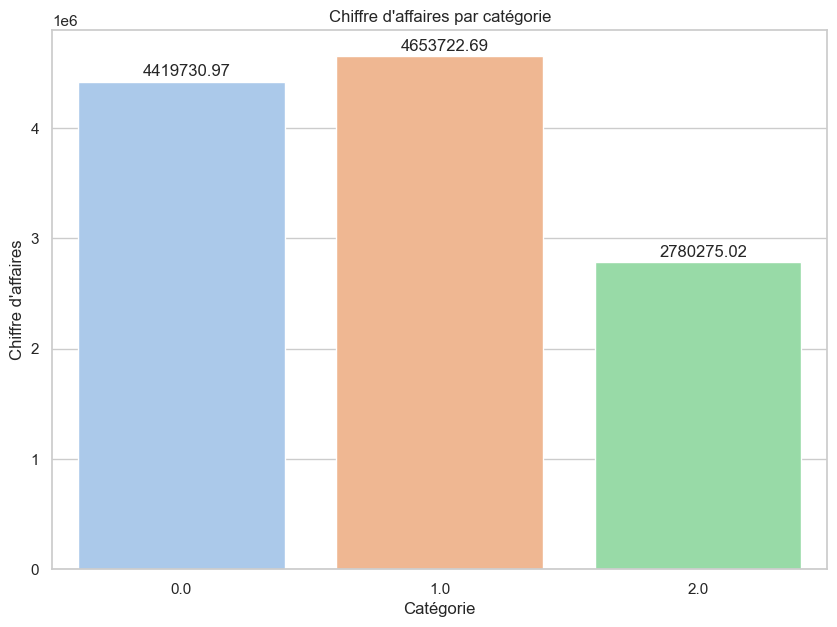

In [42]:
#Répartition du chiffre d'affaires par catégorie

#Création du dataset paar catégorie
ca_categ=data.groupby('categ').sum().reset_index()
#Renommage de la colonne price
ca_categ=ca_categ.rename(columns={'price':'chiffre_affaires'})

#Taille fenêtre
plt.figure(figsize=(10, 7))

#Palette de couleurs
sns.set_theme(style='whitegrid', palette='pastel')

sns.barplot(data=ca_categ,x='categ',y='chiffre_affaires')
plt.xlabel('Catégorie')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires par catégorie')

#affichage du chiffre d'affaires dans le graphique
ca=ca_categ['chiffre_affaires'].tolist()
for i in range(3):
    plt.text(i-0.15,ca[i]+50000,round(ca[i],2))

plt.show()

Les livres de catégorie 0 et 1 représentent la plupart de notre chiffre d'affaires. Celui procuré par les articles de catégorie 2 est particulièrement bas par rapport aux autres.

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section4_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Analyses autour des références</h3></a>
</div>

In [43]:
#Création d'un dataframe groupé par référence de livre
data_references=data.value_counts('id_prod').reset_index()

#Renommage de la colonne '0'
data_references=data_references.rename(columns={0:'nb_ventes'})

#Jointure des tables data_references et produit pour récupérer le prix
data_references=pd.merge(data_references,produits.loc[:,['categ','id_prod','price']],on='id_prod',how='left')

#Création de la colonne chiffre d'affaires
data_references['Chiffre_affaires']=data_references['nb_ventes']*data_references['price']

#Affichage du dataset
data_references

,id_prod,nb_ventes,categ,price,Chiffre_affaires
0,1_369,2252,1,23.99,54025.48
1,1_417,2189,1,20.99,45947.11
2,1_414,2180,1,23.83,51949.40
3,1_498,2128,1,23.37,49731.36
4,1_425,2096,1,16.99,35611.04
...,...,...,...,...,...
3260,0_1284,1,0,1.38,1.38
3261,0_549,1,0,2.99,2.99
3262,0_1498,1,0,2.48,2.48
3263,0_541,1,0,1.99,1.99


<h3>Prix moyen par catégorie</h3>

In [44]:
data_references.groupby('categ')['price'].mean()

categ
0     11.714760
1     25.503623
2    107.636017
Name: price, dtype: float64

La catégorie 2 se démarque à nouveau par un prix moyen bien plus élevé que les deux autres catégories.

<h3>Top 10 des références en chiffre d'affaires et en nombre de ventes</h3>

In [45]:
print('Top 10 des références en chiffre d\'affaires')
display(data_references.sort_values('Chiffre_affaires',ascending=False).head(10))
print('Top 10 des références en nombre de ventes')
display(data_references.sort_values('nb_ventes',ascending=False).head(10))

Top 10 des références en chiffre d'affaires


,id_prod,nb_ventes,categ,price,Chiffre_affaires
340,2_159,650,2,145.99,94893.50
146,2_135,1005,2,68.99,69334.95
165,2_112,968,2,67.57,65407.76
132,2_102,1027,2,59.14,60736.78
236,2_209,814,2,69.99,56971.86
12,1_395,1875,1,28.99,54356.25
0,1_369,2252,1,23.99,54025.48
205,2_110,865,2,62.25,53846.25
186,2_39,915,2,57.99,53060.85
838,2_166,228,2,230.04,52449.12


Top 10 des références en nombre de ventes


,id_prod,nb_ventes,categ,price,Chiffre_affaires
0,1_369,2252,1,23.99,54025.48
1,1_417,2189,1,20.99,45947.11
2,1_414,2180,1,23.83,51949.40
3,1_498,2128,1,23.37,49731.36
4,1_425,2096,1,16.99,35611.04
5,1_403,1960,1,17.99,35260.40
6,1_412,1951,1,16.65,32484.15
7,1_413,1945,1,17.99,34990.55
8,1_406,1939,1,24.81,48106.59
9,1_407,1935,1,15.99,30940.65


Beaucoup d'articles de catégorie 2 sont dans les tops en chiffre d'affaires, en revanche ce sont les articles de catégorie 1 qui se vendent le mieux.

<h3>Top 10 des pires références en chiffre d'affaires et en nombre de ventes</h3>

In [46]:
print('Flop 10 des références en chiffre d\'affaires')
display(data_references.sort_values('Chiffre_affaires',ascending=True).head(10))
print('Flop 10 des références en nombre de ventes')
display(data_references.sort_values('nb_ventes',ascending=True).head(10))

Flop 10 des références en chiffre d'affaires


,id_prod,nb_ventes,categ,price,Chiffre_affaires
3259,0_1539,1,0,0.99,0.99
3260,0_1284,1,0,1.38,1.38
3224,0_1653,2,0,0.99,1.98
3263,0_541,1,0,1.99,1.99
3254,0_807,1,0,1.99,1.99
3250,0_1601,1,0,1.99,1.99
3257,0_1728,1,0,2.27,2.27
3262,0_1498,1,0,2.48,2.48
3225,0_898,2,0,1.27,2.54
3244,0_1840,2,0,1.28,2.56


Flop 10 des références en nombre de ventes


,id_prod,nb_ventes,categ,price,Chiffre_affaires
3264,0_886,1,0,21.82,21.82
3247,2_98,1,2,149.74,149.74
3248,2_23,1,2,115.99,115.99
3249,0_1379,1,0,2.99,2.99
3250,0_1601,1,0,1.99,1.99
3251,0_833,1,0,2.99,2.99
3252,0_1633,1,0,24.99,24.99
3253,0_1683,1,0,2.99,2.99
3254,0_807,1,0,1.99,1.99
3263,0_541,1,0,1.99,1.99


Dans les livres qui rapportent le moins et se vendent le moins, on retrouve essentiellement des livres de catégorie 0.

<h3>Nombre d'achats sur la duré par catégorie</h3>

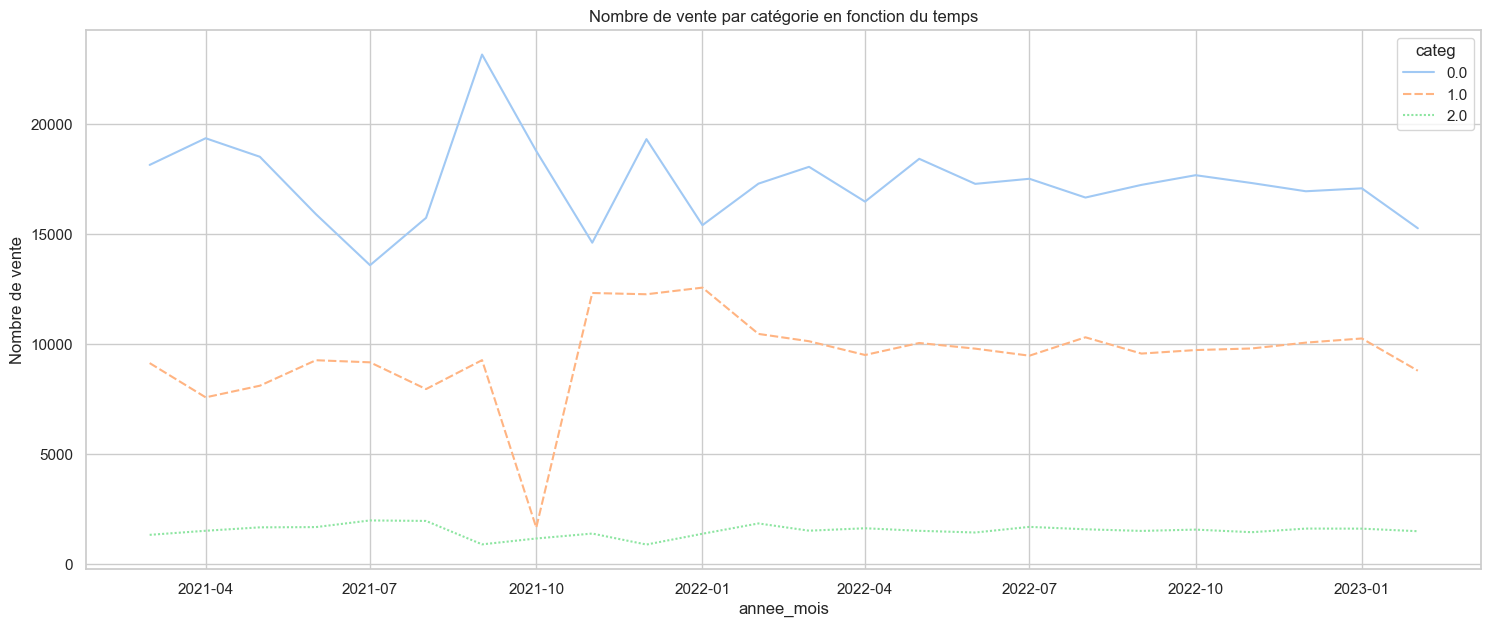

In [47]:
#Création d'un dataframe regrouppant le nombre d'achat par mois et par catégorie
achat_duree_categ=data.pivot_table(index='annee_mois',columns='categ',values='price',aggfunc='count')

#Graphique
plt.figure(figsize=(18,7))
sns.lineplot(data=achat_duree_categ)
plt.ylabel('Nombre de vente')
plt.title('Nombre de vente par catégorie en fonction du temps')
plt.show()

On retrouve la baisse du nommbre de ventes d'octobre 2021, on a en revanche un sursaut de ces ventes qui s'est légèrement maintenu par la suite.

<h3>Distribution des prix des références</h3>

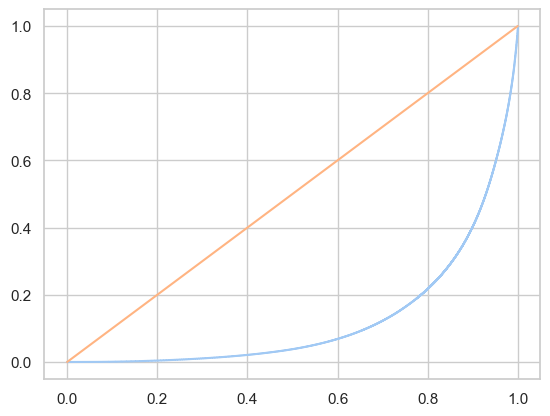

In [48]:
#Répartition du chiffre d'affaire entre clients (courbe de Lorenz)
#Dataframe regrouppant chiffre d'affaires de chaque référence
ca = data_references['Chiffre_affaires'].values

#Création de la courbe de Lorenz
n = len(ca)
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()

80% du chiffre d'affaires est détenu par les 20% d'articles générant le plus de chiffre d'affaires. C'est une répartition normale pour un commerce.

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape5"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse approfondie sur les clients</h2></a>
</div>

<h3>Répartition des clients par âge</h3>

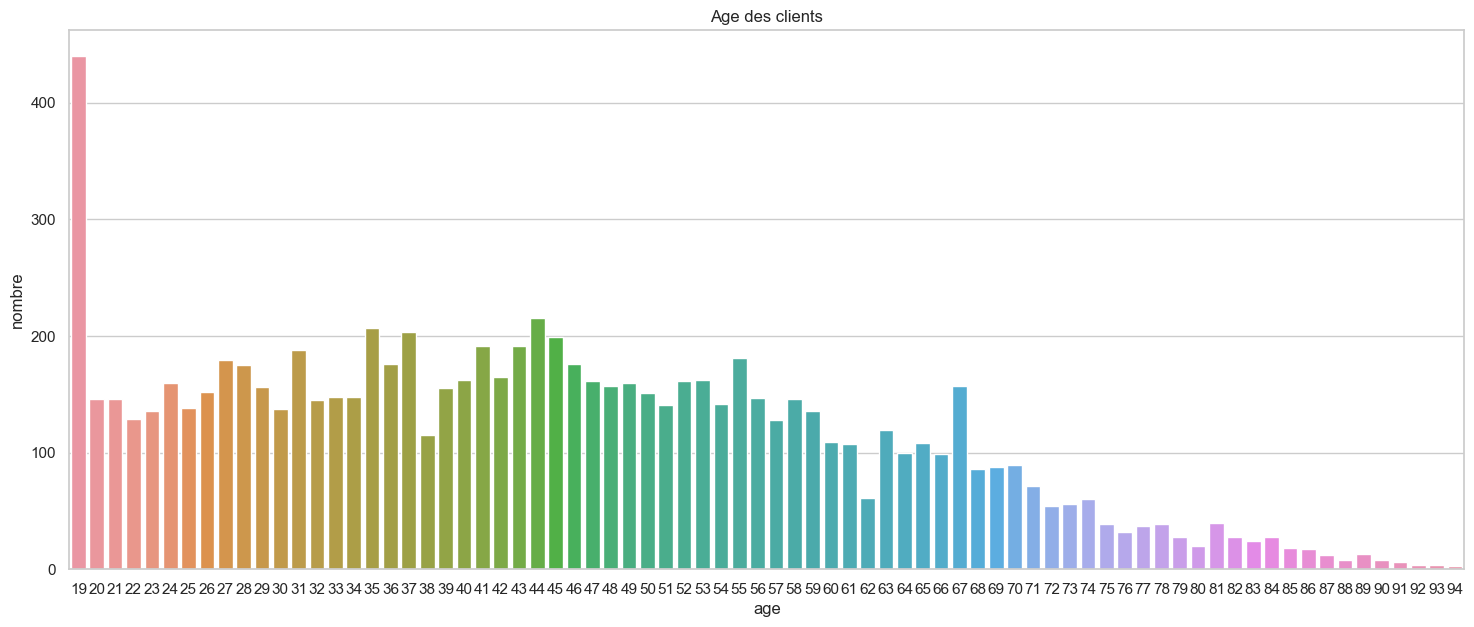

In [115]:
#Répoartition des clients par age

#Âge des clients
age_count= clients["age"].value_counts().rename_axis('age_client').reset_index(name='nombre').sort_values(by='age_client')

#Graphique
plt.figure(figsize=(18,7))
sns.barplot(data=age_count,y='nombre', x='age_client')
plt.xlabel('age')
plt.title('Age des clients')
plt.show()

Nous avons un pic pour les personnes de 19 ans.

<h3>Top 10 des clients les plus fidèles</h3>

C:\Users\adrie\AppData\Local\Temp\ipykernel_19100\3624777976.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_clients=data.groupby('client_id').sum().sort_values('price',ascending=False).reset_index().head(10)


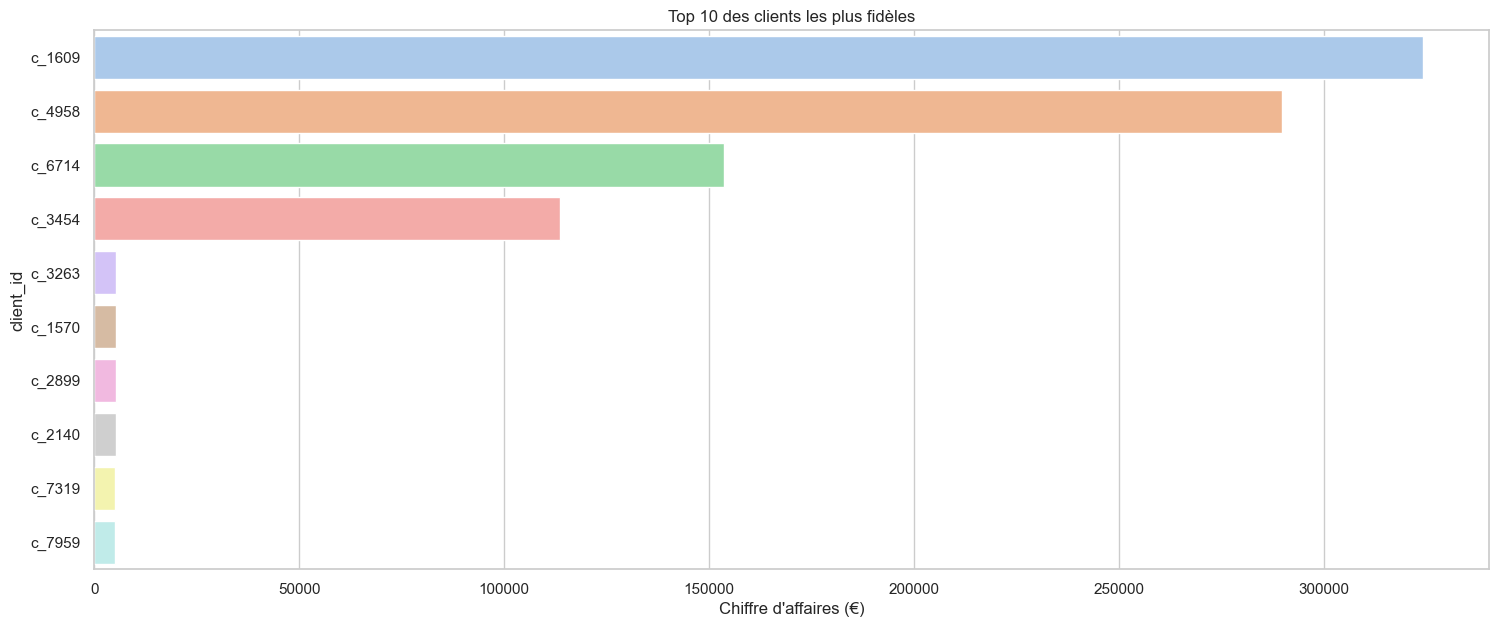

In [50]:
#Top 10 des clients les plus fidèles
#Création du dataset en regroupant par client, triant par chiffre d'affaire et ne sélectionnant que les 10 premiers
top_clients=data.groupby('client_id').sum().sort_values('price',ascending=False).reset_index().head(10)
#Suppression des colonnes age et categ
top_clients=top_clients.drop(columns=['age','categ'])

#Graphique

#Taille du graphique
plt.figure(figsize=(18,7))

sns.barplot(data=top_clients,y='client_id', x='price')
plt.xlabel("Chiffre d'affaires (€)")
plt.title('Top 10 des clients les plus fidèles')
plt.show()

Quatre clients se démarquent particulièrement. Il doit s'ajir de sociétés comme par exemple des bibliothèques ou des revendeurs.

In [110]:
#Affichage des clients depuis la base clients
clients.loc[clients['client_id'].isin(top_clients.head(4)['client_id'])]

,client_id,sex,age
612,c_2140,f,46
1484,c_1570,f,44
3943,c_2899,f,29
4725,c_3263,f,38


In [51]:
#Quelle part du chiffre d'affaire représentent ces quatre clients ?
ca_top_quatre=top_clients.head(4).sum()[1]
ca_top_quatre
print('Ces 4 clients représentent',round(100*ca_top_quatre/ca_total,2),'% du chiffre d\'affaires')

Ces 4 clients représentent 7.43 % du chiffre d'affaires


Reprise du graphique sans les quatre clients exceptionnels.

C:\Users\adrie\AppData\Local\Temp\ipykernel_19100\2097927210.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_clients=sous_echantillon.groupby('client_id').sum().sort_values('price',ascending=False).reset_index().head(10)


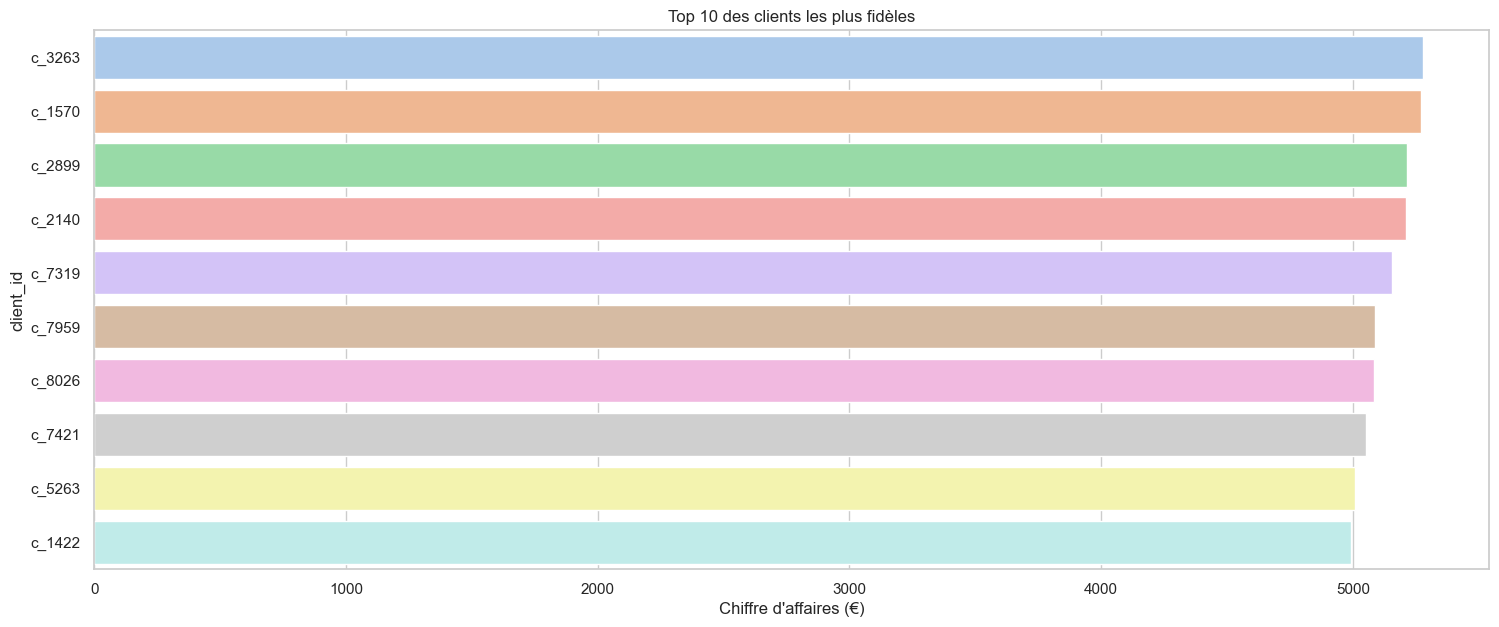

In [52]:
#Top 10 des clients les plus fidèles

#Création d'un sous échantillon avec tous les clients sauf les clients exceptionnels
sous_echantillon=data.loc[~data['client_id'].isin(['c_1609','c_4958','c_6714','c_3454'])]

#Création du dataset en regroupant par client, triant par chiffre d'affaire et ne sélectionnant que les 10 premiers
top_clients=sous_echantillon.groupby('client_id').sum().sort_values('price',ascending=False).reset_index().head(10)
#Suppression des colonnes age et categ
top_clients=top_clients.drop(columns=['age','categ'])

#Graphique

#Taille du graphique
plt.figure(figsize=(18,7))

sns.barplot(data=top_clients,y='client_id', x='price')
plt.xlabel("Chiffre d'affaires (€)")
plt.title('Top 10 des clients les plus fidèles')
plt.show()

<h3>Répartition du chiffre d'affaires entre clients</h3>

C:\Users\adrie\AppData\Local\Temp\ipykernel_19100\840432080.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca = data.groupby('client_id').sum()['price'].values


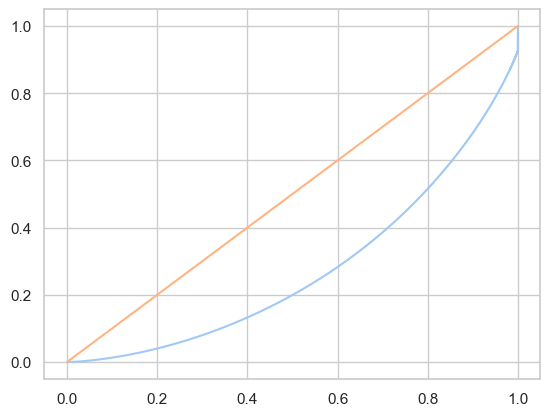

In [53]:
#Répartition du chiffre d'affaire entre clients (courbe de Lorenz)
#Dataframe regrouppant le chiffre d'affaire de chaque client
ca = data.groupby('client_id').sum()['price'].values

#Création de la courbe de Lorenz
n = len(ca)
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()

On observe bien sur la courbe le saut provoqué par les quatre clients les plus fidèles.

In [54]:
#Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('L\'indice de Gini de la courbe de lorenz est : ',round(gini,2))

L'indice de Gini de la courbe de lorenz est :  0.45


<h3>Répartition du chiffre d'affaires entre clients (Sans les clients exceptionnels)</h3>

C:\Users\adrie\AppData\Local\Temp\ipykernel_19100\2460349272.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca = sous_echantillon.groupby('client_id').sum()['price'].values


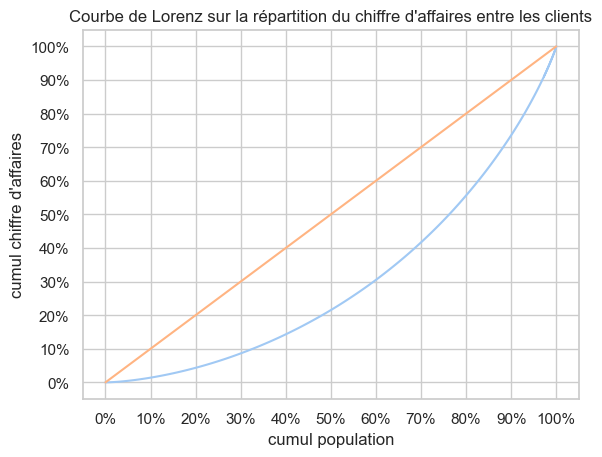

In [55]:
#Répartition du chiffre d'affaire entre clients (courbe de Lorenz)

#Création d'un sous échantillon avec tous les clients sauf les clients exceptionnels
sous_echantillon=data.loc[~data['client_id'].isin(['c_1609','c_4958','c_6714','c_3454'])]

#Dataframe regrouppant le chiffre d'affaire de chaque client
ca = sous_echantillon.groupby('client_id').sum()['price'].values

#Création de la courbe de Lorenz
n = len(ca)
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice

#Ajout de la présentation en pourcentages car ce graphique sera dans le diaporama de présentation
plt.xticks(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.xlabel('cumul population')
plt.ylabel("cumul chiffre d'affaires")

plt.title('Courbe de Lorenz sur la répartition du chiffre d\'affaires entre les clients')
plt.show()

In [56]:
#Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('L\'indice de Gini de la courbe de lorenz est : ',round(gini,2))

L'indice de Gini de la courbe de lorenz est :  0.4


La distribution des achats est donc bien mieux répartie.

Pour la suite de l'analyse, je ne considérerais pas les quatre clients exceptionnels.

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape6"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse de 5 corellations</h2></a>
</div>

In [57]:
#Création d'un sous échantillon avec tous les clients sauf les clients exceptionnels
sous_echantillon=data.loc[~data['client_id'].isin(['c_1609','c_4958','c_6714','c_3454'])]

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section6_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.1 - Lien entre le genre d’un client et les catégories des livres achetés</h3></a>
</div>

In [58]:
#Analyse du lien entre genre et catégorie par Chi-2
X = "sex"
Y = "categ"

cont = sous_echantillon[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,200793,111331,16980,329104
m,186488,101017,15868,303373
Total,387281,212348,32848,632477


Considérons l'hypothèse nulle : absence de correllation entre les variables

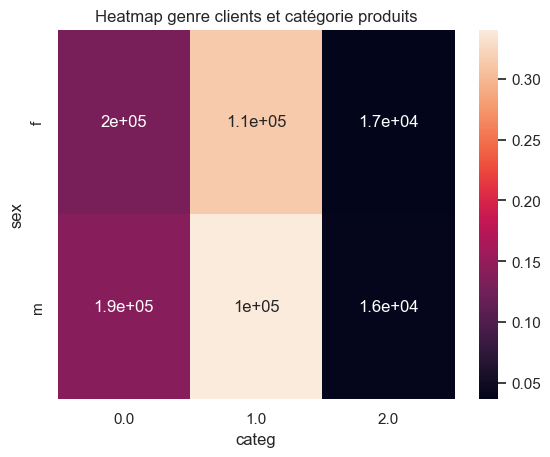

In [59]:
#Affichage de la heatmap
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(sous_echantillon)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace éventuelles les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Heatmap genre clients et catégorie produits')
plt.show()

In [60]:
#Calcul du Chi-2 et de la p-value à partir de la matrice des valeurs observées avec scipy 
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
chi2, pvalue, degrees, expected = st.chi2_contingency(cont.iloc[:-1,:-1]) #la dernière ligne et la dernière colonne contient les totaux.
print("Valeur Chi-2 :",chi2,"; p-valeur :",pvalue,"; degré de liberté :",degrees)

Valeur Chi-2 : 20.213460693513895 ; p-valeur : 4.080400389217356e-05 ; degré de liberté : 2


La p-valeur est au-delà de notre seuil de significativité (5%), l'hypothèse nulle est rejetée en faveur de l’hypothèse alternative, il existe donc un lien entre le sexe des clients et les catégories livre.

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section6_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.2 - Lien entre l'âge des clients et le montant total des achats</h3></a>
</div>

In [61]:
#Montant des achats par âge
achats_age = sous_echantillon.groupby(['age'])['price'].sum()
achats_age = achats_age.reset_index()

In [62]:
Y = achats_age['price']
X = achats_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

Text(0.5, 1.0, 'Montant des achats par âges')

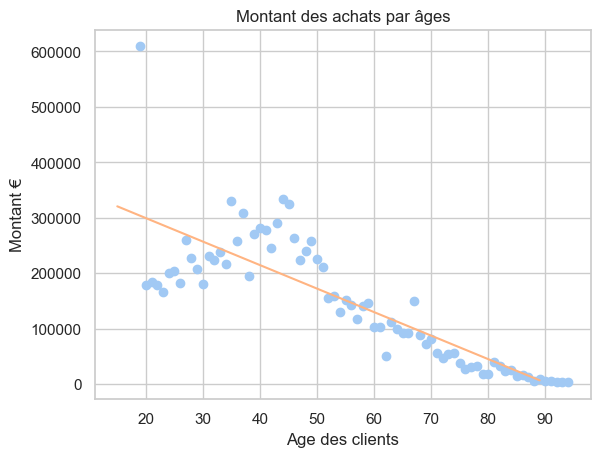

In [63]:
#Diagramme de dispersion
plt.plot(achats_age.age,achats_age.price, "o")
#Droite de régression linéaire
plt.plot(np.arange(15,90),[a*x+b for x in np.arange(15,90)])

#Axes et titre
plt.ylabel('Montant €')
plt.xlabel('Age des clients')
plt.title('Montant des achats par âges')

In [64]:
#Coefficient de corrélation linéaire (coefficient de Pearson)
achats_age = achats_age.reset_index()
print('Coefficient de Pearson : ',st.pearsonr(achats_age['age'], achats_age['price'])[0])

Coefficient de Pearson :  -0.8306553438502088


In [65]:
#Test de Spearman
st.spearmanr(achats_age['age'], achats_age['price'])

SignificanceResult(statistic=-0.8736842105263158, pvalue=7.352708223159905e-25)

Le chiffre d'affaires des vente décroit avec l'âge des clients.

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section6_3"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.3 - Lien entre l'âge des clients et la fréquence d’achat</h3></a>
</div>

In [66]:
#Création d'un dataframe contenant le nombre d'achats de chaque client

#Comptage du nombre de références achetées par age de client
nb_achats=sous_echantillon['age'].value_counts()

#L'index de nb_achats contient les modalités
modalites = nb_achats.index

#Création du tableau à partir des modalités
frequence_age = pd.DataFrame(modalites, columns = ["age"])

#Ajout du nombre d'achats
frequence_age["n"] = nb_achats.values

#Calcul de la fréquence
frequence_age["f"] = frequence_age["n"] / len(sous_echantillon)

display(frequence_age)

,age,n,f
0,35,25000,0.039527
1,44,24878,0.039334
2,45,24659,0.038988
3,37,23465,0.037100
4,43,21921,0.034659
...,...,...,...
71,91,311,0.000492
72,88,271,0.000428
73,93,226,0.000357
74,94,201,0.000318


Text(0.5, 1.0, "Fréquence d'achat en fonction de l'âge")

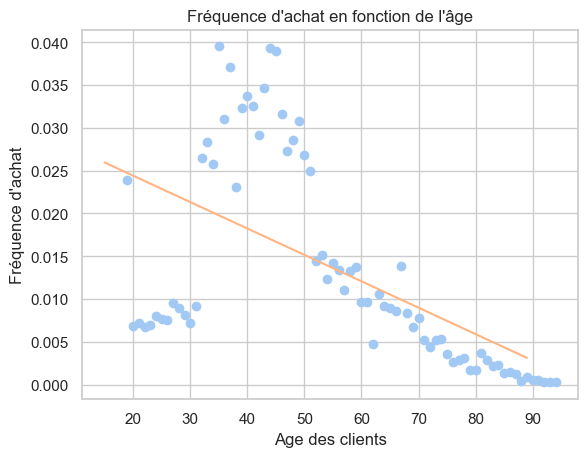

In [67]:
#Création du grpahique
Y = frequence_age['f']
X = frequence_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

#Diagramme de dispersion
plt.plot(frequence_age.age,frequence_age.f, "o")
#Droite de régression linéaire
plt.plot(np.arange(15,90),[a*x+b for x in np.arange(15,90)])

#Axes et titre
plt.ylabel('Fréquence d\'achat')
plt.xlabel('Age des clients')
plt.title('Fréquence d\'achat en fonction de l\'âge')

In [68]:
#Coefficient de corrélation linéaire (coefficient de Pearson)
print('Coefficient de Pearson : ',st.pearsonr(frequence_age['age'], frequence_age['f'])[0])

Coefficient de Pearson :  -0.5744824507923253


La tendance montre une fréquence d'achat inversement proportionnelle à l'âge des clients. Cette observation est d'autant plus vraie pour les clients de plus de 50 ans. On observe deux autres groupes. 

<h3>Les 19-31 ans</h3>

Nous allons exclure la valeur atypique correspondnat à 19 ans pour gagner en visibilité.

In [69]:
#Création d'un sous_sous_échantillon avec la classe d'âge concernée.
sous_sous_echantillon=sous_echantillon.loc[(sous_echantillon['age']<=31)&(sous_echantillon['age']>19)]

#Comptage du nombre de références achetées par age de client
nb_achats=sous_sous_echantillon['age'].value_counts()

#L'index de nb_achats contient les modalités
modalites = nb_achats.index

#création du tableau à partir des modalités
frequence_age = pd.DataFrame(modalites, columns = ["age"])

#Ajout du nombre d'achats
frequence_age["n"] = nb_achats.values

#Calcul de la fréquence
frequence_age["f"] = frequence_age["n"] / len(sous_echantillon)


Text(0.5, 1.0, "Fréquence d'achat en fonction de l'âge")

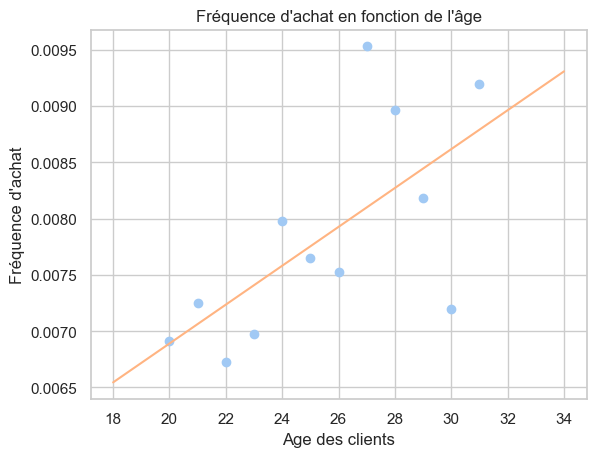

In [70]:
#Création du grpahique
Y = frequence_age['f']
X = frequence_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

#Diagramme de dispersion
plt.plot(frequence_age.age,frequence_age.f, "o")
#Droite de régression linéaire
plt.plot(np.arange(18,35),[a*x+b for x in np.arange(18,35)])

#Axes et titre
plt.ylabel('Fréquence d\'achat')
plt.xlabel('Age des clients')
plt.title('Fréquence d\'achat en fonction de l\'âge')

In [71]:
#Coefficient de corrélation linéaire (coefficient de Pearson)
print('Coefficient de Pearson : ',st.pearsonr(frequence_age['age'], frequence_age['f'])[0])

Coefficient de Pearson :  0.658155124867954


Le coefficient est positif, on peut dont émettre l'hypothèse comme quoi dans la classe dâge ]19;31], la fréquence d'achats augmente avec l'âge.

<h3>Les 32-51 ans</h3>

In [72]:
#Création d'un sous_sous_échantillon avec la classe d'âge concernée.
sous_sous_echantillon=sous_echantillon.loc[(sous_echantillon['age']<=51)&(sous_echantillon['age']>31)]

#Comptage du nombre de références achetées par age de client
nb_achats=sous_sous_echantillon['age'].value_counts()

#L'index de nb_achats contient les modalités
modalites = nb_achats.index

#création du tableau à partir des modalités
frequence_age = pd.DataFrame(modalites, columns = ["age"])

#Ajout du nombre d'achats
frequence_age["n"] = nb_achats.values

#Calcul de la fréquence
frequence_age["f"] = frequence_age["n"] / len(sous_echantillon)

Text(0.5, 1.0, "Fréquence d'achat en fonction de l'âge")

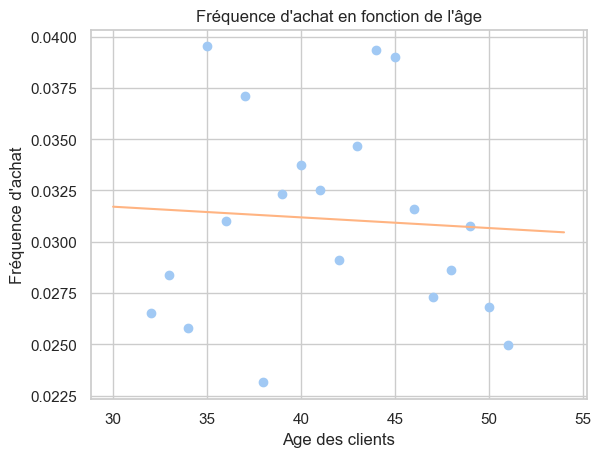

In [73]:
#Création du grpahique
Y = frequence_age['f']
X = frequence_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

#Diagramme de dispersion
plt.plot(frequence_age.age,frequence_age.f, "o")
#Droite de régression linéaire
plt.plot(np.arange(30,55),[a*x+b for x in np.arange(30,55)])

#Axes et titre
plt.ylabel('Fréquence d\'achat')
plt.xlabel('Age des clients')
plt.title('Fréquence d\'achat en fonction de l\'âge')

In [74]:
#Coefficient de corrélation linéaire (coefficient de Spearman car l'échantillon est inférieur à 20 individus)
print('Coefficient de Spearman : ',st.spearmanr(frequence_age['age'], frequence_age['f'])[0])

Coefficient de Spearman :  -0.05714285714285714


Le coefficient est proche de 0, on peut dont émettre l'hypothèse comme quoi dans la classe dâge ]32;51], la fréquence d'achats n'évolue pas avec l'âge.

<h3>52 ans et plus</h3>

In [75]:
#Création d'un sous_sous_échantillon avec la classe d'âge concernée.
sous_sous_echantillon=sous_echantillon.loc[(sous_echantillon['age']>52)]

#Comptage du nombre de références achetées par age de client
nb_achats=sous_sous_echantillon['age'].value_counts()

#L'index de nb_achats contient les modalités
modalites = nb_achats.index

#création du tableau à partir des modalités
frequence_age = pd.DataFrame(modalites, columns = ["age"])

#Ajout du nombre d'achats
frequence_age["n"] = nb_achats.values

#Calcul de la fréquence
frequence_age["f"] = frequence_age["n"] / len(sous_echantillon)

Text(0.5, 1.0, "Fréquence d'achat en fonction de l'âge")

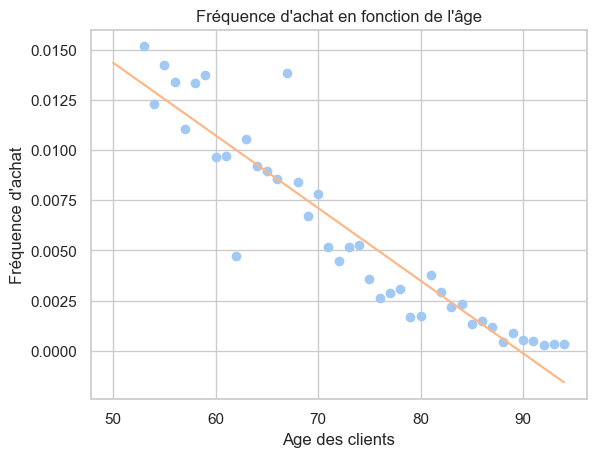

In [76]:
#Création du grpahique
Y = frequence_age['f']
X = frequence_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

#Diagramme de dispersion
plt.plot(frequence_age.age,frequence_age.f, "o")
#Droite de régression linéaire
plt.plot(np.arange(50,95),[a*x+b for x in np.arange(50,95)])

#Axes et titre
plt.ylabel('Fréquence d\'achat')
plt.xlabel('Age des clients')
plt.title('Fréquence d\'achat en fonction de l\'âge')

In [77]:
#Coefficient de corrélation linéaire (coefficient de Pearson)
print('Coefficient de Spearman : ',st.spearmanr(frequence_age['age'], frequence_age['f'])[0])

Coefficient de Spearman :  -0.9603338608425478


Le coefficient est négatif, on peut dont émettre l'hypothèse comme quoi dans la classe d'âge 52 ans et plus, la fréquence d'achats diminue avec l'âge.

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section6_4"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.4 - Lien entre l'âge des clients et la taille du panier moyen</h3></a>
</div>

In [78]:
#Grouppement de data par age avec aggrégation moyenne en ne gardant que les colonnes intéressantes
#Comptage de la taille du panier de chaque client par session
age_panier_moyen=sous_echantillon.groupby(['client_id','session_id','age']).count().reset_index()

#Calcul de la moyenne des paniers par client
age_panier_moyen=age_panier_moyen.groupby(['client_id',"age"]).agg({'id_prod':'mean'}).reset_index()

#Renommage de la colonne id_prod
age_panier_moyen=age_panier_moyen.rename(columns={'id_prod':'taille_panier_moyen'})

#Grouppement par âge avec aggrégation moyenne
age_panier_moyen=age_panier_moyen.groupby('age').mean().reset_index()

display(age_panier_moyen)

C:\Users\adrie\AppData\Local\Temp\ipykernel_19100\2876670360.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_panier_moyen=age_panier_moyen.groupby('age').mean().reset_index()


,age,taille_panier_moyen
0,19,1.819899
1,20,1.760903
2,21,1.777140
3,22,1.798059
4,23,1.915485
...,...,...
71,90,1.709922
72,91,1.619075
73,92,1.880499
74,93,1.260473


Text(0.5, 1.0, "Panier moyen en fonction de l'âge")

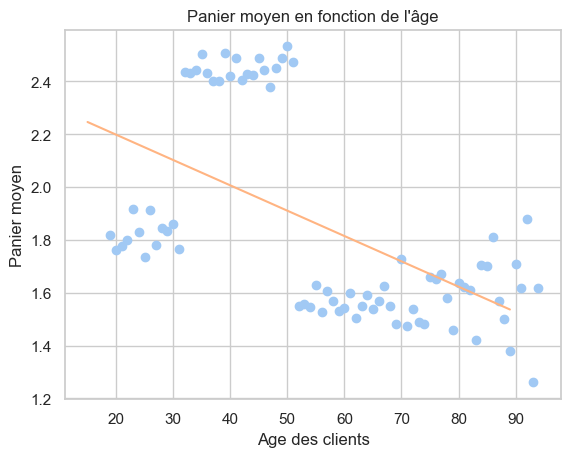

In [79]:
#Création du grpahique
Y = age_panier_moyen['taille_panier_moyen']
X = age_panier_moyen[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

#Diagramme de dispersion
plt.plot(age_panier_moyen.age,age_panier_moyen.taille_panier_moyen, "o")
#Droite de régression linéaire
plt.plot(np.arange(15,90),[a*x+b for x in np.arange(15,90)])

#Axes et titre
plt.ylabel('Panier moyen')
plt.xlabel('Age des clients')
plt.title('Panier moyen en fonction de l\'âge')

In [80]:
#Coefficient de corrélation linéaire (coefficient de Pearson)
print('Coefficient de Spearman : ',st.spearmanr(age_panier_moyen['age'], age_panier_moyen['taille_panier_moyen'])[0])

Coefficient de Spearman :  -0.6081203007518796


In [81]:
#Observation de la tranche d'âge exceptionnelle
age_panier_moyen.loc[age_panier_moyen['taille_panier_moyen']>2]

,age,taille_panier_moyen
13,32,2.435672
14,33,2.432929
15,34,2.443687
16,35,2.505227
17,36,2.432115
18,37,2.400514
19,38,2.401347
20,39,2.508450
21,40,2.418701
22,41,2.488420


Globalement plus un client est âgé, plus plus son panier sera petit, la classe d'âge \[32,51\] fait exception.

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section6_5"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.5 - Lien entre l'âge des clients et la catégorie des livres achetés</h3></a>
</div>

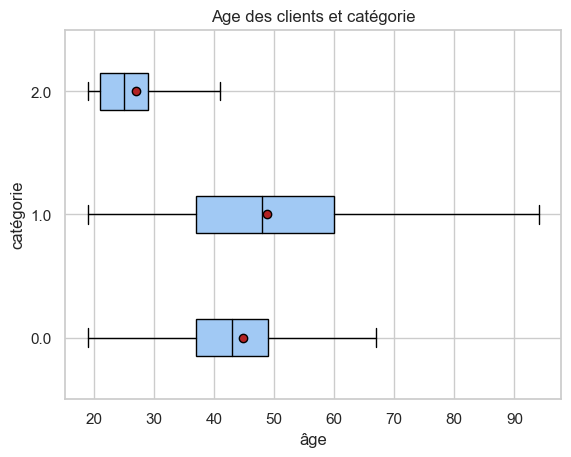

In [100]:
#Recherche de corrélation par la méthode ANOVA
X = "categ" # qualitative
Y = "age" # quantitative

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques   
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Age des clients et catégorie')
plt.xlabel('âge')
plt.ylabel('catégorie')

plt.show()

In [101]:
#Calcul de eta carré
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11329836196639995

D'après la valeur de eta carré, il y a, à priori, une faible corélation entre l'âge d'un client et la catégorie de livre qu'il achète.